# Predicting ability to repay a loan
### Complete ML Model using Keras-TF

---------------

### Project info

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we will build a model that can predict wether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

This is a binary classification problem.

### Data Dictionary

The 'loan_status' column shows our target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dic = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
df_dic

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


---

# Useful tools

In [3]:
print(df_dic.loc['revol_util']['Description'])

#if we want to grab any feature description any time

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    '''func to grab any feature description any time'''
    print(df_dic.loc[col_name]['Description'])

In [121]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


## Describe

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

#there is missing data and some categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.shape

(396030, 27)

---

# EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

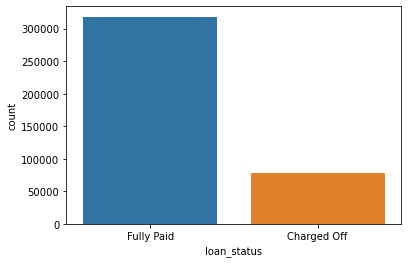

In [9]:
#target: loan_status, let's take a overview

sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

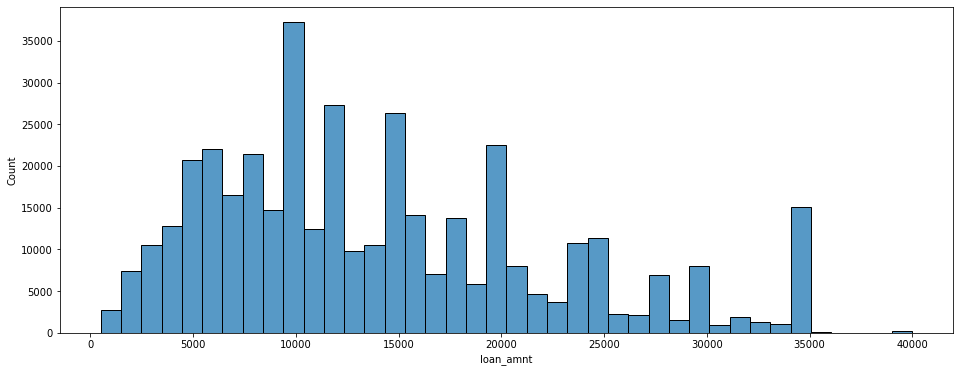

In [10]:
#loan_amnt

plt.figure(figsize=(16,6))
sns.histplot(df['loan_amnt'],bins=40)

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

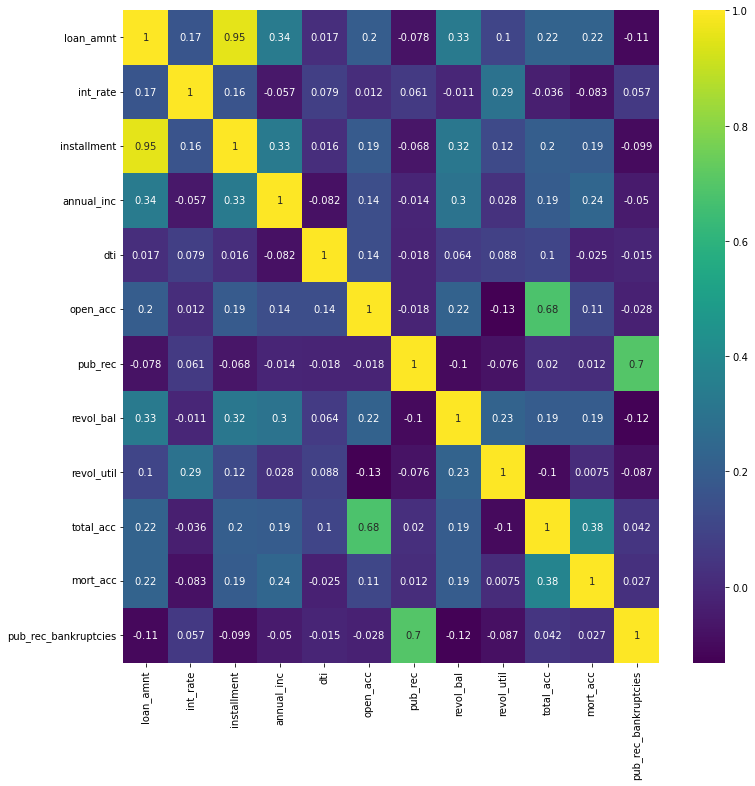

In [12]:
#Correlation heatmap

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

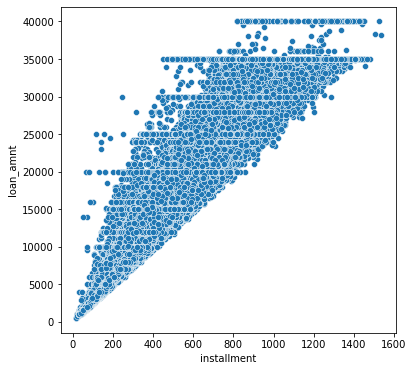

In [13]:
#obvious correlation between loan total amount and installment. 

plt.figure(figsize=(6,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

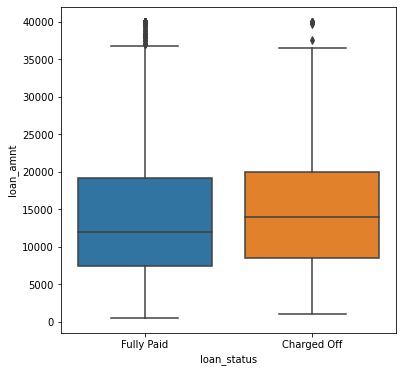

In [14]:
#loan_status and loan_amnt, no significant difference on results to when fully paid or charge off

plt.figure(figsize=(6,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
#Analysing grades

df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
#sub_grades

df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

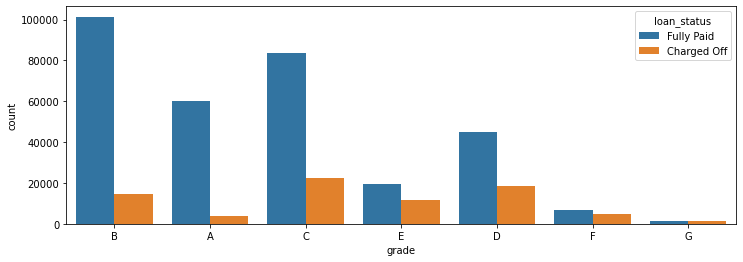

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',hue='loan_status',data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

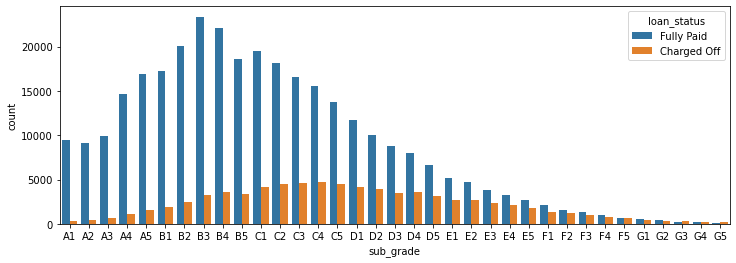

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status',order=sorted(df['sub_grade'].unique()),data=df)

#now we can see some correlations.
#1) F and G looks doesn't get paid enough
#2) proportions of chagerd off loans increases from A1 to C4

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

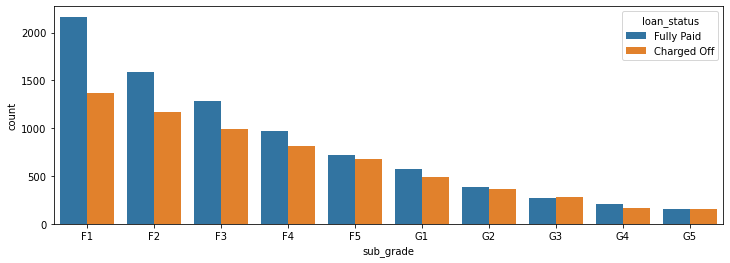

In [20]:
#Isolating sub grades F and G to look closely

plt.figure(figsize=(12,4))
f_g = df[(df['grade']=='F') | (df['grade']=='G')]
sns.countplot(x='sub_grade',hue='loan_status',order=sorted(f_g['sub_grade'].unique()),data=df)

In [21]:
#transformming categorical loan_status in number

df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [22]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

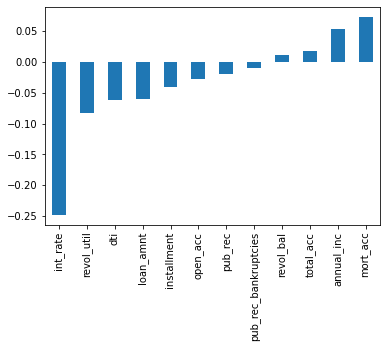

In [23]:
#loan_repaid vs. other features

df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

#more income and more mortgage accounts results in more fully paid loans.

---

# PreProcessing

Removing or filling any missing data. Removing unnecessary or repetitive features. Converting categorical string features to dummy variables.

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


---

### Missing Data

In [25]:
df.shape

#396030 instances
#28 features

(396030, 28)

In [26]:
#missing values per column

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
# % of missing values in each column

df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [28]:
#dropping columns with missing data and very low correlation or categorical that we are not interested

feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
#There are too many unique job titles to try to convert this to a dummy variable feature.

df['emp_title'].nunique()

173105

In [30]:
#so, let's drop it

df = df.drop('emp_title',axis=1)

In [31]:
#emp_length now

emp_length = df['emp_length'].dropna().unique()
sorted(emp_length)

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_length_sorted = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

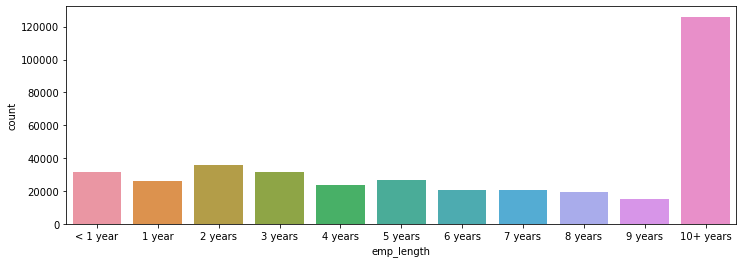

In [33]:
#plot

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

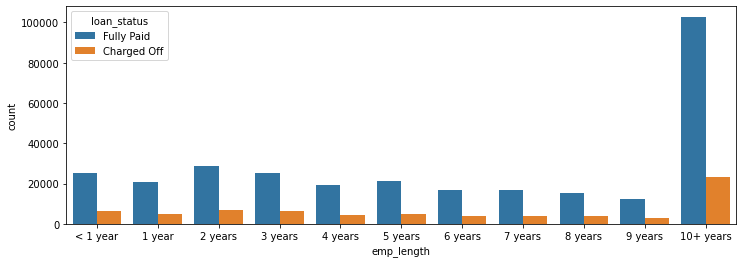

In [34]:
# vs. loan_status

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted,hue='loan_status')

In [35]:
# vs. Loan_status in %

emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

emp_len = emp_co/emp_fp

emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

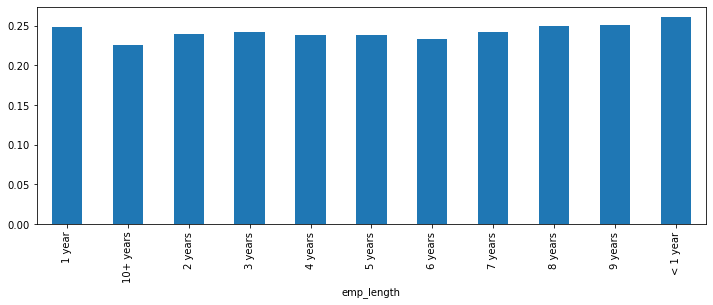

In [36]:
#Charge off rates are extremely similar across all employment lengths. Let's drop it.

plt.figure(figsize=(12,4))
emp_len.plot(kind='bar')

In [37]:
df = df.drop('emp_length',axis=1)

In [38]:
# similar columns: purpose and title

df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [40]:
#let's drop it.

df = df.drop('title',axis=1)

In [41]:
#Correlations with mort_acc

df.corr()['mort_acc'].sort_values()

#Moderate correlation between mort_acc and total_acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [42]:
#Mean of the mort_acc per total_acc

df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [43]:
#We will fill in that missing value with the mean value corresponding to its total_acc value

perc_of_total = df.groupby('total_acc').mean()['mort_acc']

In [44]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values.
    Checks if the mort_acc is NaN.
    If so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    '''
    if np.isnan(mort_acc):
        return perc_of_total[total_acc]
    else:
        return mort_acc

In [45]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [46]:
#result:

df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [47]:
# revol_util and the pub_rec_bankruptcies have missing data points.

df.isnull().sum()/len(df)*100


# but they account for less than 0.5% of the total data. Let's drop the rows with missing values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

#complete missing data adjustment:

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

---

### Categorical to Dummy Variables

In [50]:
#calling categorical columns using dtypes

df.select_dtypes(['object']).columns

#Let's go through all the categorical features to see what we should do with them.

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [51]:
#term feature

df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [52]:
#transforming in int 36 and 60

df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [53]:
# grade feature is part of sub_grade, so let's drop it.

df = df.drop('grade',axis=1)

In [54]:
#subgrades to dummies

subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True) #drop_first=True means actually dropping this column

In [55]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [56]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [57]:
#home_ownership can be converted to dummy variables, but will be interesting replace NONE and ANY with OTHER, 
#so we end up with just 4 categories.

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [58]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [59]:
ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,ownership_dummies],axis=1)

In [60]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [61]:
#let´s look the rest of the features first

df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [62]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [63]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [64]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [65]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [66]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [67]:
#we can transform 'verification_status', 'application_type','purpose', 'initial_list_status' to dummies variables at once

dummies = pd.get_dummies(df[['verification_status', 'purpose', 'initial_list_status', 'application_type']],drop_first=True)
df = df.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [68]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_

In [69]:
#issue_d: we wouldn't know beforehand whether or not a loan would be issued when using our model, 
#so in theory we wouldn't have an issue_date. Let's drop it

df = df.drop('issue_d',axis=1)

In [70]:
#This appears to be a historical time stamp feature. 
#Let's extract the year from this and convert it to a numeric feature and set a new column to this.

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [71]:
#adress: let's feature engineer a zip code column from the address 

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [72]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [73]:
#We have just a few zip codes so we can transform in to dummies

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

#all the preprocessing is done! :p

---

# Machine Learning

---

### Train Test Split

In [74]:
import sklearn

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df['loan_status'][0]

'Fully Paid'

In [77]:
df['loan_repaid'][0]

1

In [78]:
df = df.drop('loan_status',axis=1)

In [79]:
X = df.drop('loan_repaid',axis=1).values

In [80]:
y = df['loan_repaid'].values

In [81]:
# if using a low ram computer we can use a sample

# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<br>

---

### Handling imbalanced data

In [83]:
# oversampling minority data

from imblearn.over_sampling import RandomOverSampler

In [84]:
ros = RandomOverSampler(random_state=42)

In [85]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

---

### Normalizing the data

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
X_ros = scaler.fit_transform(X_ros)

In [89]:
X_test = scaler.transform(X_test)

---

### Creating the Model

In [90]:
import tensorflow as tf

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [92]:
X_train.shape

#we have 78 features, so we'll use this number in our first layer

(276653, 78)

In [93]:
#To review about the number of hidden layers: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model = Sequential()

# input layer
model.add(Dense(78, activation='relu')) # first layer = dense is the same number of features
model.add(Dropout(0.2)) # dropout to prevent overfitting in each layer

# hidden layer
model.add(Dense(156, activation='relu')) # second layer = dense is half of the first
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(78, activation='relu')) # third layer = dense is half of the second
model.add(Dropout(0.2))

# output layer for binary problem
model.add(Dense(units=1,activation='sigmoid'))

# compile model for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam')

In [104]:
#fitting the model

model.fit(x=X_ros, 
          y=y_ros, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          verbose=0,
         )

In [105]:
#saving the model

from tensorflow.keras.models import load_model

In [106]:
model.save('complete_data_project_model_one.h5')  

---

### Evaluating Model Performance

In [107]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

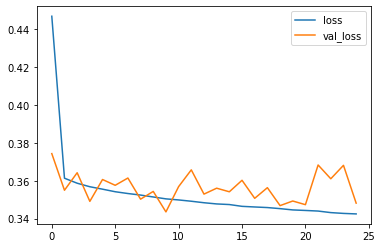

In [108]:
#model loss vs. test sample loss

losses[['loss','val_loss']].plot()

---

### Predictions

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
pred = (model.predict(X_test) > 0.5).astype('int32') # > 0.5).astype('int32')  to classify

3706/3706 [==============================] - 21s 6ms/step


In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61     23363
           1       0.94      0.79      0.86     95203

    accuracy                           0.80    118566
   macro avg       0.72      0.80      0.73    118566
weighted avg       0.85      0.80      0.81    118566



In [112]:
confusion_matrix(y_test,pred)

array([[18749,  4614],
       [19664, 75539]], dtype=int64)

In [113]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [114]:
317696/len(df)

0.8038479931379817

In [115]:
#Final observations:

# our model is performming better than just a straight guess (89% from model vs. 80% straight guess)
# but our f1-score is still low at first attempt (0.61)
# so let's try to improve it playing with layers, density and dropout.

---
### Let's pick up a customer and verify if whether or not they are likely to pay back the loan

In [116]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [117]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype('int32') # 1,78 is the same shape of the model

1/1 [==============================] - 0s 176ms/step


array([[1]])

###  Now let's check, if this person actually end up paying back their loan

In [118]:
df.iloc[random_ind]['loan_repaid']

#we got it right in this case

1.0

---

# Comments

In [119]:
#after try many possibilities of layers and dropouts the result of f1-score on Charge Off classification was not so good. 
#it's because we have an unbalanced data set over our target feature.

---

<br>

# Random Forest

<br>

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=42)

rf.fit(X_train,y_train)

predictions2 = rf.predict(X_test)

print(confusion_matrix(y_test,predictions2))
print('<------>')
print(classification_report(y_test,predictions2))

[[10117 13246]
 [  943 94260]]
<------>
              precision    recall  f1-score   support

           0       0.91      0.43      0.59     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.88    118566
   macro avg       0.90      0.71      0.76    118566
weighted avg       0.88      0.88      0.86    118566

